In [1]:
import sys

sys.path.append("..")

In [2]:
from nrc import NoisyRingsClustering
from experiments.datagen import random_circles, random_noise
import numpy as np
import matplotlib.pyplot as plt
from experiments.draw import plot_results
from experiments.colors import get_vibrant_colors
from experiments.utils import save_experiment
import datetime

np.random.seed(42)
plt.rcParams["figure.dpi"] = 600
plt.rcParams["figure.figsize"] = (8, 8)

INFO:nrc.fuzzy_c_means:[FuzzyCMeans] Converged after 5 iterations. Stopping early.
INFO:nrc.noisy_rings_clustering:Total noise samples: 0


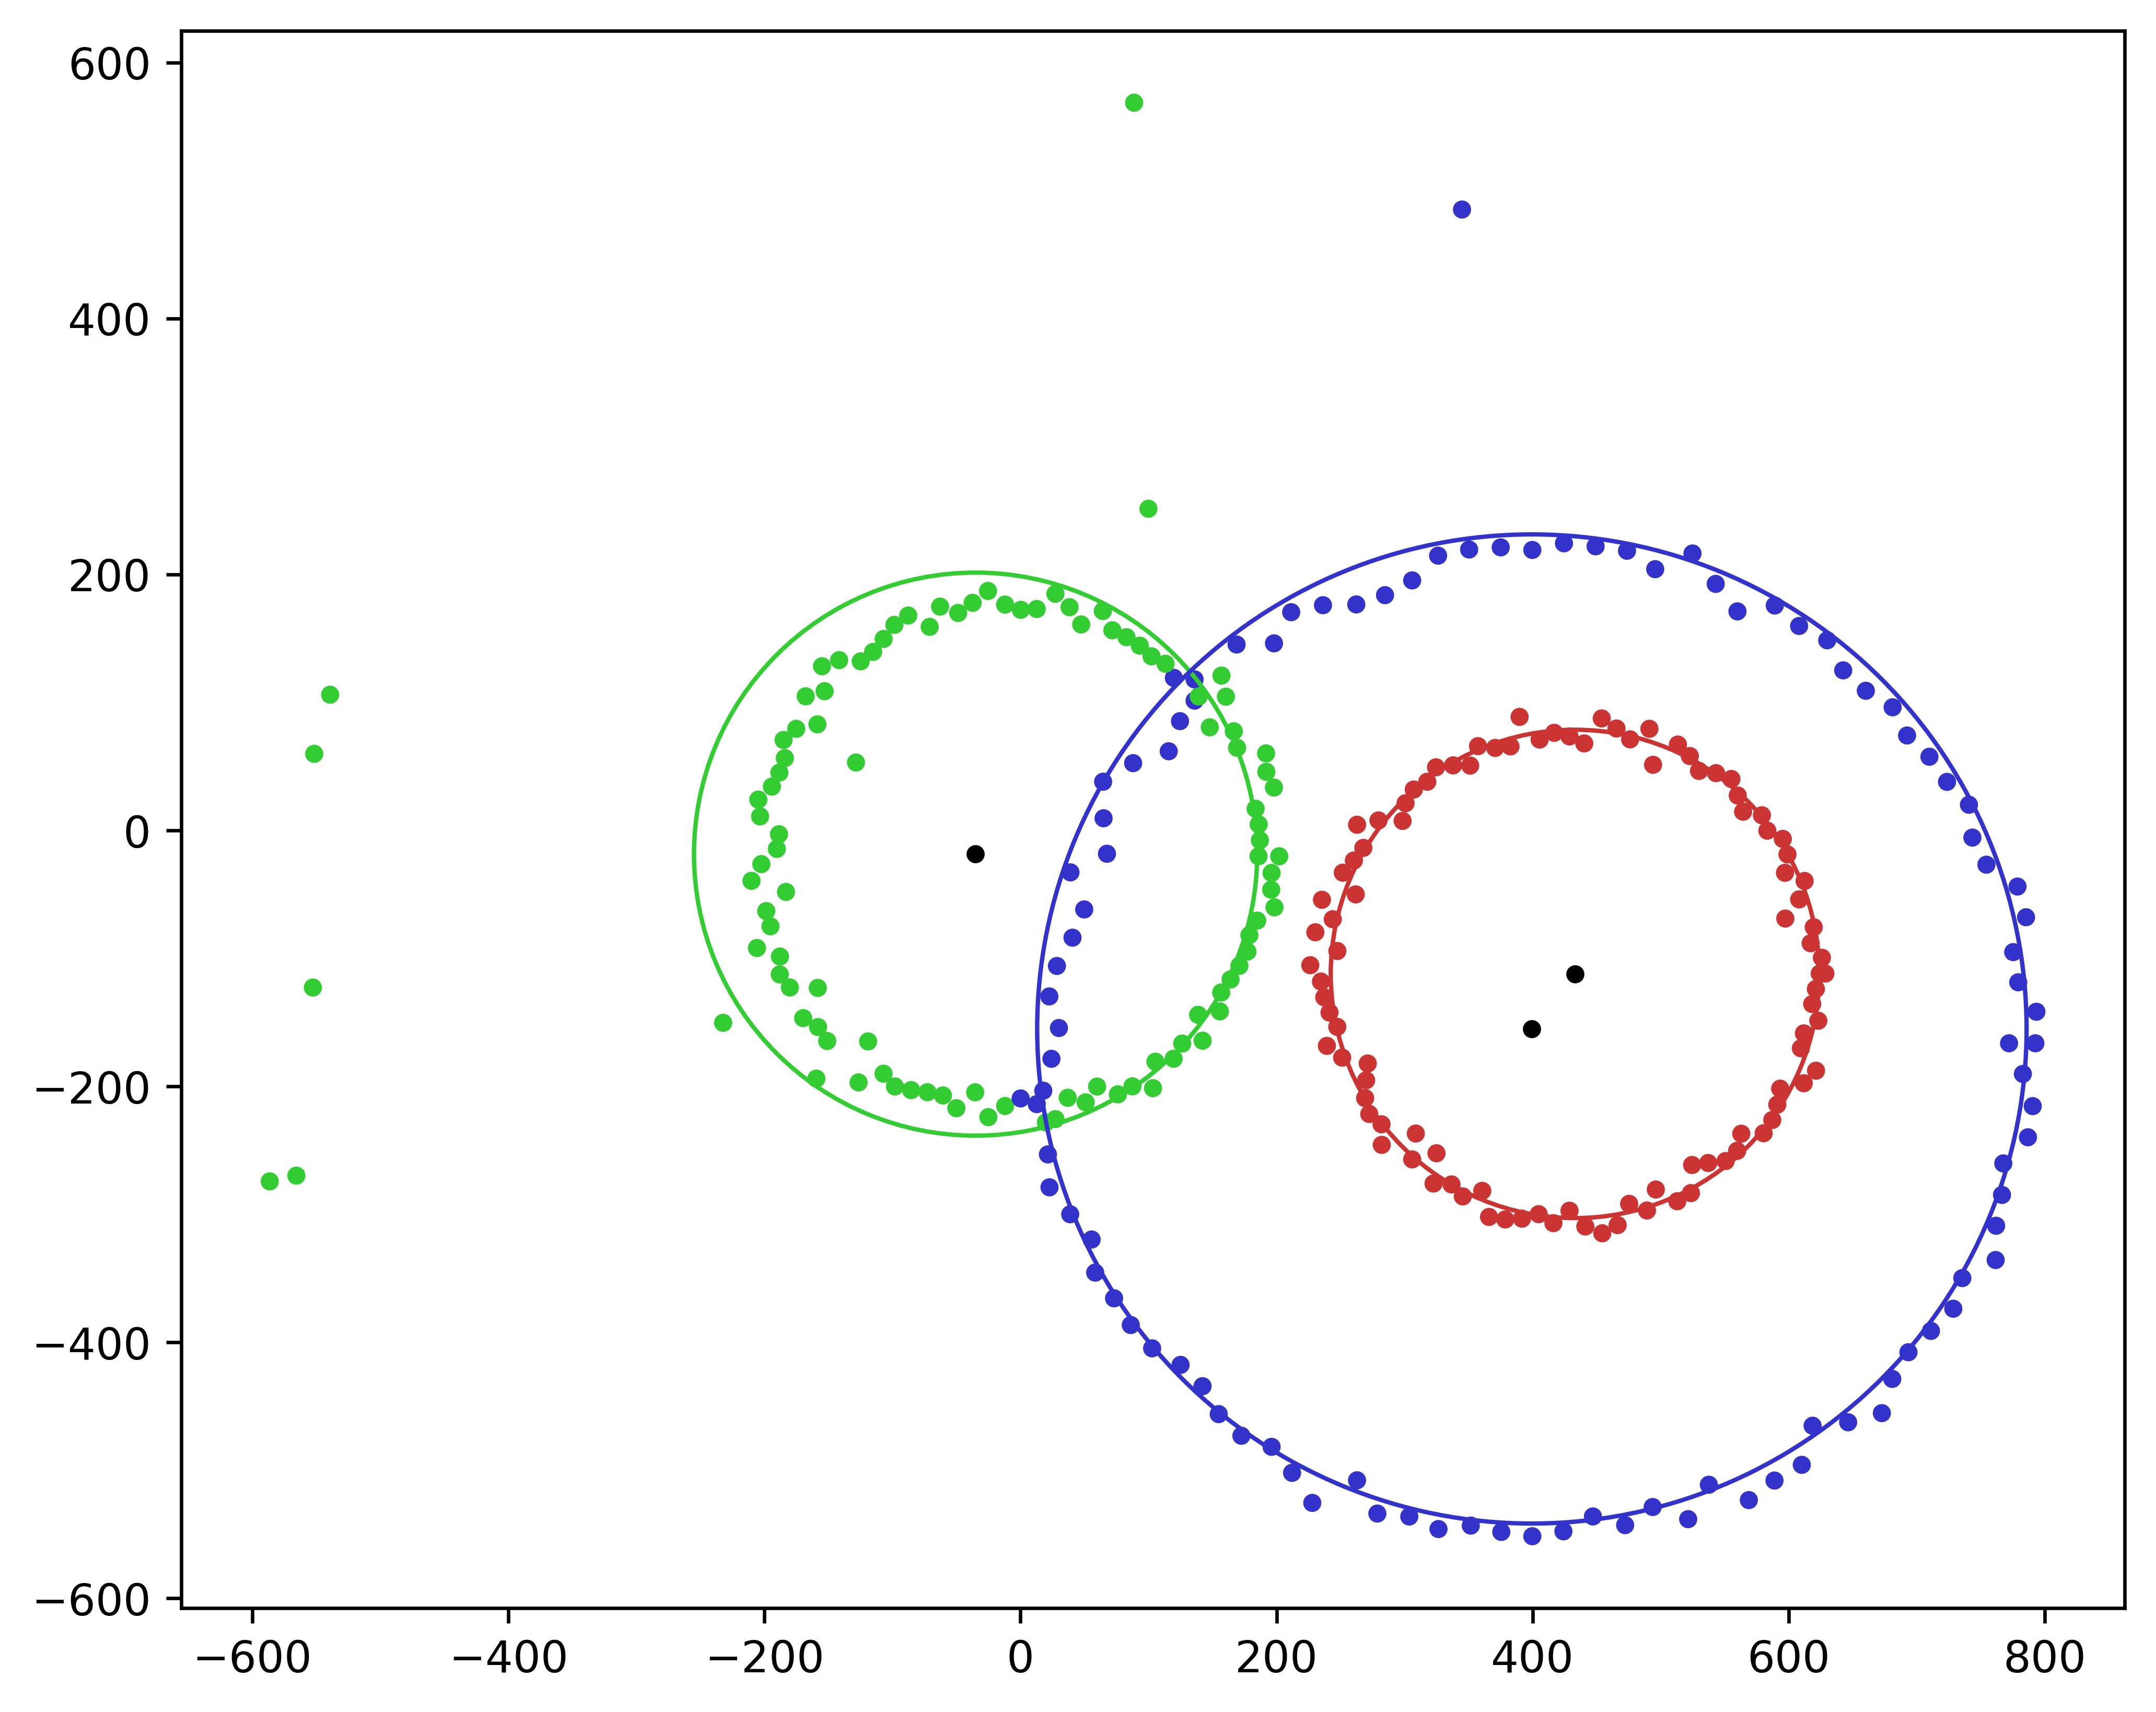

In [4]:
# ================ HELPERS ================
EXCENTRIC = np.array([[-600, -600], [-600, 600], [600, -600], [600, 600]])
CONCENTRIC = np.array([[0, 0], [0, 0], [0, 0], [0, 0]])
EXCENTRIC_CLOSE = np.array(
    [[-200, -200], [-200, 200], [200, -200], [200, 200]])
NOISE_CONCENTRIC_DELIM = np.array(
    [[-1200, -1200], [-1200, 1200], [1200, -1200], [1200, 1200]]
)


# ================ RINGS PARAMETERS ================
CENTER_DELIMS = EXCENTRIC

MINMAX_RADIUS = np.array([100, 400])
N_RINGS = 3
CIRCLES_NOISE = 8
N_SAMPLES_PER_RING = 100

# ================ BG NOISE PARAMETERS ================
N_BACKGROUND_NOISE = 10
CENTER_DELIMS_NOISE = EXCENTRIC

# ================ ALGORITHM PARAMETERS ================
# "fuzzycmeans" or "concentric"
INIT_METHOD = "fuzzycmeans"
FUZINESS_PARAM = 1.1
CONVERGENCE_EPS = 1e-5
MAX_ITERS = 10000
NOISE_DISTANCE_THRESHOLD = 100
APPLY_NOISE_REMOVAL = True

circles = random_circles(
    CENTER_DELIMS, MINMAX_RADIUS, N_SAMPLES_PER_RING, N_RINGS, noise=CIRCLES_NOISE
)

# Generate additional noise
noise = random_noise(CENTER_DELIMS_NOISE, N_BACKGROUND_NOISE)

# Combine circles and noise|
circles = np.concatenate([circles, noise])


model = NoisyRingsClustering(
    n_rings=N_RINGS,
    q=FUZINESS_PARAM,
    convergence_eps=CONVERGENCE_EPS,
    max_iters=MAX_ITERS,
    noise_distance_threshold=NOISE_DISTANCE_THRESHOLD,
    apply_noise_removal=APPLY_NOISE_REMOVAL,
    init_method=INIT_METHOD,
)
model.fit(circles)


# Get the clustering results
radii, centers, memberships = model.get_labels()

# Define distinct vibrant colors for each ring
vibrant_colors = get_vibrant_colors(N_RINGS)
# Ensure we have as many vibrant colors as we have rings
if len(vibrant_colors) < N_RINGS:
    raise ValueError(
        "Not enough distinct vibrant colors for the number of rings")
fig = plot_results(
    circles, radii, centers, memberships, vibrant_colors
)

In [88]:
NAME = "expr" + datetime.datetime.now().strftime("%Y%m%d%H%M%S")
SUBFOLDER = "bg_noise"
save_experiment(
    model,
    circles,
    NAME,
    SUBFOLDER,
    {
        "n_background_noise": N_BACKGROUND_NOISE,
        "circles_noise": CIRCLES_NOISE,
        "n_samples_per_ring": N_SAMPLES_PER_RING,
    },
)

In [252]:
import matplotlib


def save_plot_to_tikz(name):
    old_backend = matplotlib.get_backend()
    matplotlib.use("pgf")
    fig.savefig(f"{name}.pgf")
    matplotlib.use(old_backend)


save_plot_to_tikz(NAME)